# 만질 수 있는 시각화: Plotly

In [3]:
# 만질 수 있는 시각화: Plotly

import pandas as pd
df = pd.read_csv("Data/Data.csv")
df["OrderDate"] = pd.to_datetime(df["OrderDate"])     # 날짜 타입으로 만들어주기
df["year"] = df["OrderDate"].dt.year
df["month"] = df["OrderDate"].dt.month        # 연과 월 뽑아내기
df

,OrderID,OrderDate,Gender,AgeGroup,Channel,ShipDate,ItemCode,MapCode,Quantity,Revenue,...,Category,Item Type,Region,Country,Code2,Code3,Latitude,Longitude,year,month
0,100013196,2020-03-20,Female,30s,Online,2020-03-22,D10002,34,46,35576.60,...,Office,Office Supplies,Asia,Taiwan,TW,TWN,23.697810,120.960515,2020,3
1,100061261,2018-06-20,Female,50s,Offline,NaN,D10001,5,69,10222.80,...,Home,Household,Asia,China,CN,CHN,35.861660,104.195397,2018,6
2,100071990,2020-06-20,Female,20s,Online,2020-06-22,D10001,3,53,31731.50,...,Home,Household,Europe,Belgium,BE,BEL,50.503887,4.469936,2020,6
3,100074136,2019-04-12,Male,40s,Online,2019-04-15,C10003,31,84,30739.60,...,Foods,Vegetables,Asia,South Korea,KR,KOR,35.907757,127.766922,2019,4
4,100103318,2018-03-27,Male,30s,Offline,NaN,C10004,7,56,62652.90,...,Foods,Fruits,America,Cuba,CU,CUB,21.300000,-80.000000,2018,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27652,999944102,2018-04-23,Male,30s,Offline,NaN,D10002,5,55,30235.45,...,Office,Office Supplies,Asia,China,CN,CHN,35.861660,104.195397,2018,4
27653,999951398,2018-02-18,Female,30s,Online,2018-02-25,C10002,38,63,12194.19,...,Foods,Beverages,Europe,United Kingdom,GB,GBR,51.513330,-0.088947,2018,2
27654,999998605,2018-11-25,Female,60s,Offline,2018-11-25,B10001,4,57,21593.28,...,Clothes,Clothes,America,Canada,CA,CAN,45.423494,-75.697933,2018,11
27655,999999463,2020-09-02,Female,40s,Online,2020-09-07,C10006,5,44,36596.83,...,Foods,Cereal,Asia,China,CN,CHN,35.861660,104.195397,2020,9


In [8]:
import warnings
warnings.filterwarnings("ignore")

df20 = df[df["year"] == 2020]
df20["Margin"] = df20["Revenue"] - df20["Cost"]      # 순수익 구해줌

0             Taiwan
2            Belgium
5            Vietnam
8              Spain
9              China
            ...     
27630          Yemen
27636         Sweden
27637    Philippines
27640          Yemen
27655          China
Name: Country, Length: 8567, dtype: object

In [15]:
# 국가별로 매출과 이익 합계 산출
df_g = df20.groupby("Country")[["Revenue", "Margin"]].sum()
df_g.head()

,Revenue,Margin
Country,,
Australia,17937580.10,5.998658e+06
Austria,3618448.90,1.193857e+06
Belgium,6990961.80,2.331454e+06
Canada,12659751.70,3.981548e+06
China,35419012.93,1.143323e+07


In [22]:
pd.options.display.float_format = "{:.2f}".format      # e+06 이런식으로 나오는 거 숫자로 나오게 바꿔줌 

df_g = df_g.sort_values("Margin", ascending = False)
df_g["Rank"] = range(1, len(df_g) + 1)

top10 = df_g.head(10)
top10

,Revenue,Margin,Rank
Country,,,
China,35419012.93,11433231.09,1
United States of America,30921686.00,10058265.87,2
Australia,17937580.10,5998658.34,3
Canada,12659751.70,3981548.49,4
Japan,11144287.40,3429964.29,5
Russia,10409143.00,3230082.90,6
Sweden,9347376.63,3072071.39,7
South Korea,9333921.70,3062749.61,8
Spain,9294640.60,3052992.63,9


# 막대그래프

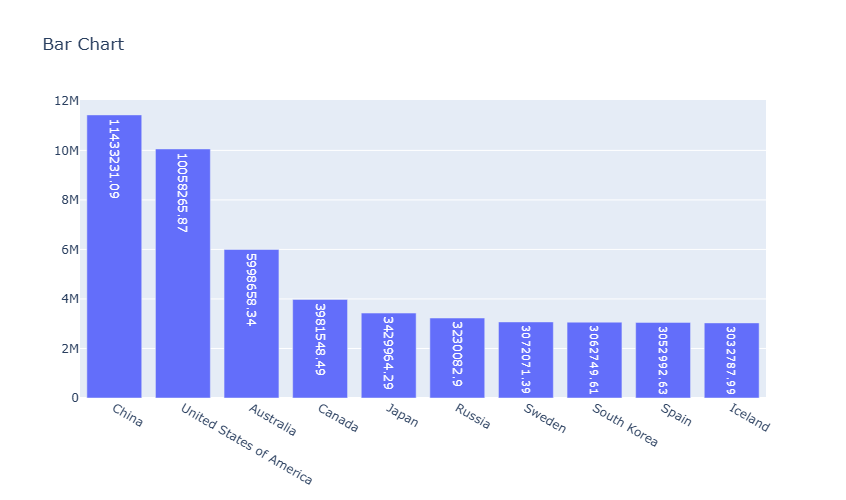

In [25]:
import plotly.graph_objects as go

A = go.Bar(x = top10.index, y = top10["Margin"],      # 막대그래프를 만든다
           text = round(top10["Margin"],2))

data = [A]                          # 리스트를 만들어서 A를 넣는다 <<  여러개 그릴 경우에 data = [A, B] 이런식으로 쓰기위해

layout = go.Layout(title = "Bar Chart", width = 500, height = 500)       # 레이아웃 적절히 설정해 도화지 만듦

fig = go.Figure(data, layout)
fig.show()

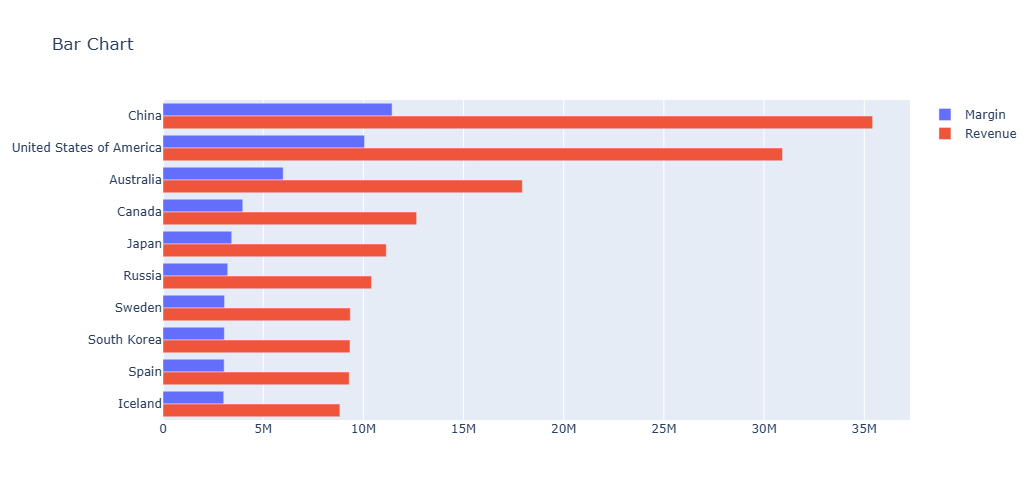

In [28]:
# 응용  -  겹쳐서 그리기

A = go.Bar(y = top10.index, x = top10["Margin"],    # x,y 바꿔서 눕혀져있는 그래프 그림
           name = "Margin", orientation = "h")  
B = go.Bar(y = top10.index, x = top10["Revenue"], 
           name = "Revenue", orientation = "h")

data = [A, B]

layout = go.Layout(title = "Bar Chart", width = 500, height = 500,
                   yaxis = {"autorange" : "reversed"})

fig = go.Figure(data, layout)
fig.show()

# 산점도 & 선 그래프

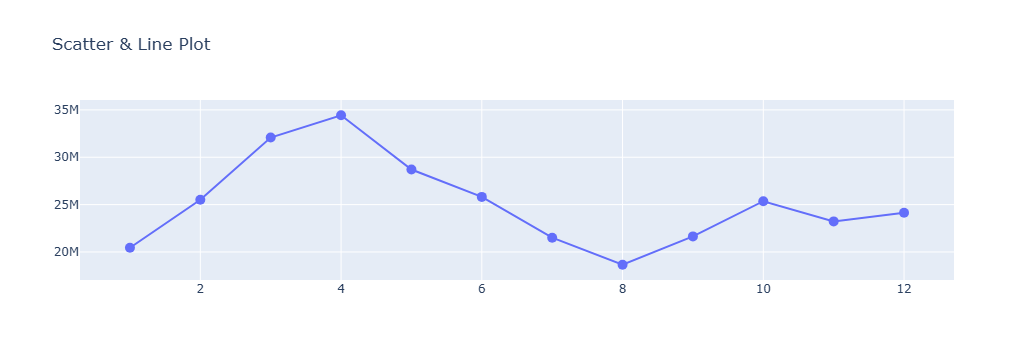

In [40]:
# 산점도 & 선 그래프
df_g = df.groupby(["year", "month"])["Revenue"].sum().reset_index()   # 연도별,월별 매출액
df_g_20 = df_g[df_g["year"] == 2020]

A = go.Scatter(x = df_g_20["month"], y = df_g_20["Revenue"], mode = "lines+markers", marker = {"size" : 10})
                                                        #선만그리고 싶으면 lines, 산점도만 그리고 싶으면 markers
data = [A]
layout = go.Layout(title = "Scatter & Line Plot")

fig = go.Figure(data, layout)
fig.show()

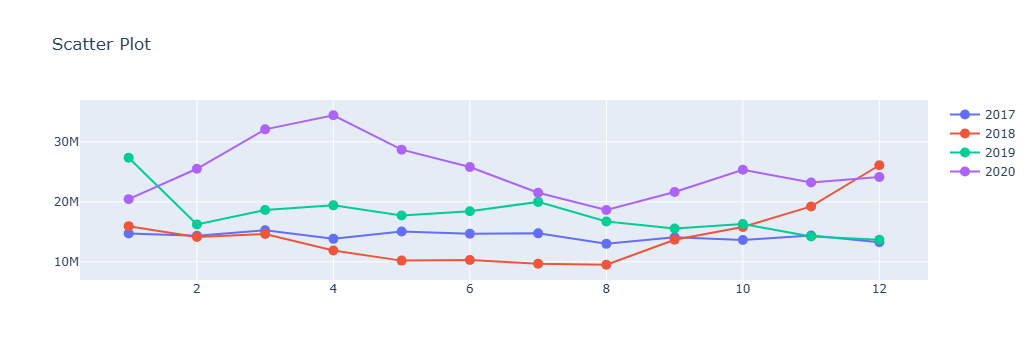

In [54]:
# 퀴즈: 연도 별로 산점도 & 선그래프 겹쳐서 그리기

box = []
for i in df_g['year'].unique():
    A = df_g[df_g['year'] == i]
    box.append(go.Scatter(x = A['month'], y = A['Revenue'], 
                          name = str(i), marker = dict(size = 10)))

layout = go.Layout(title = 'Scatter Plot')
fig = go.Figure(box, layout)
fig.show()

# 파이 차트

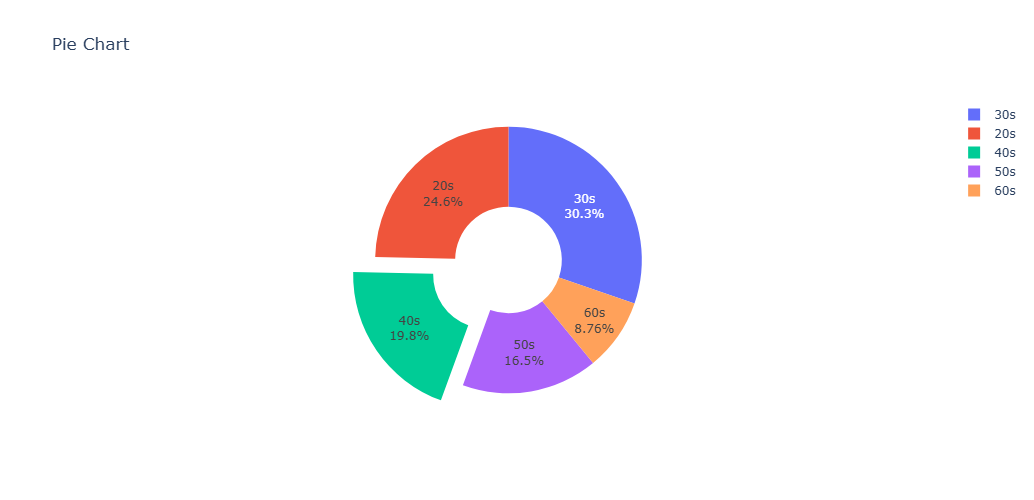

In [67]:
# 파이 차트 그리기

df_g1 = df20.groupby("AgeGroup", as_index = False)["Revenue"].sum()    # as_index = False :  reset_index하는 것과 같음

A = go.Pie(labels = df_g1["AgeGroup"],
           values = df_g1["Revenue"],
           hole = 0.4,                # 도넛처럼 중앙에 구멍뚫리게 하는 법
           textinfo = "label + percent",      # label만 표시할수도, percent만 표시할수도, 같이할수도 O.
           pull = [0, 0, 0.2, 0, 0])      # 쪼개져서 벌어지게 하는 법

data = [A]
layout = go.Layout(title = 'Pie Chart', width = 500, height = 500)
fig = go.Figure(data, layout)
fig.show()

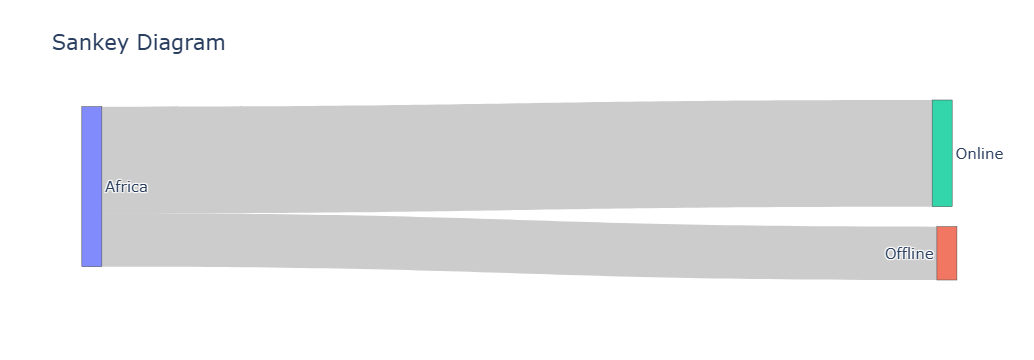

In [69]:
# 생키 다이어그램 차트 그리기

A = go.Sankey(node = dict(label = ["Africa", "Offline", "Online"]),
              link = dict(source = [0, 0],
                          target = [1, 2],        # 아프리카에서 오프라인으로, 아프리카에서 온라인으로
                          value = [100, 200]))

data = [A]
layout = go.Layout(title = 'Sankey Diagram', font_size = 15)
fig = go.Figure(data, layout)
fig.show()

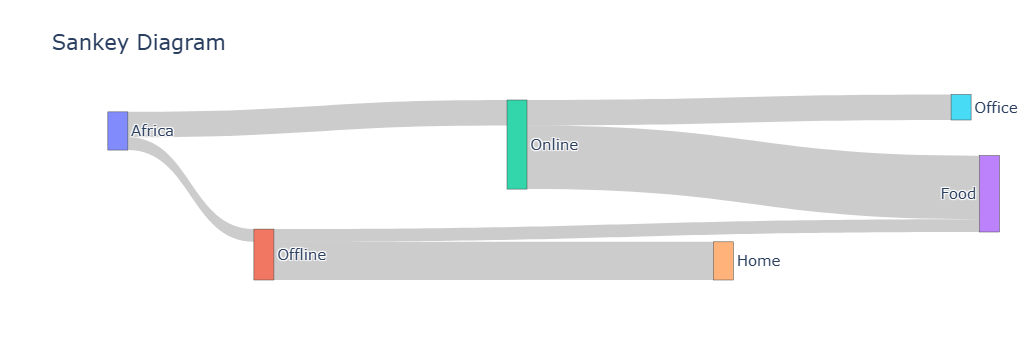

In [70]:
# 생키 다이어그램 차트 그리기

A = go.Sankey(node = dict(label = ["Africa", "Offline", "Online", "Food", "Home", "Office"]),
              link = dict(source = [0, 0, 1, 1, 2, 2, 2],
                          target = [1, 2, 3, 4, 5, 3, 3],
                          value = [100, 200, 100, 300, 200, 500]))

data = [A]
layout = go.Layout(title = 'Sankey Diagram', font_size = 15)
fig = go.Figure(data, layout)
fig.show()

In [73]:
import numpy as np
arr = np.array([1,2,3])
np.repeat(arr, 2)      # arr을 2번 반복해라 ->  11 22 33 (123123아님)

array([1, 1, 2, 2, 3, 3])

In [75]:
np.repeat(range(0,len(arr)), len(arr))       # 0부터 2까지 3번 반복해라; 000 111 222

array([0, 0, 0, 1, 1, 1, 2, 2, 2])

In [79]:
df_g = df20.iloc[:, [13,4,11,9]]    # 해당하는 열만 가져옴 
df_g = df_g.sort_values(["Region", "Channel", "Category"])
df_g

,Region,Channel,Category,Revenue
251,Africa,Offline,Beauty & Health,30153.90
906,Africa,Offline,Beauty & Health,37879.40
2009,Africa,Offline,Beauty & Health,30171.10
2687,Africa,Offline,Beauty & Health,37120.40
3225,Africa,Offline,Beauty & Health,30551.30
...,...,...,...,...
13569,Oceania,Online,Office,36624.30
15226,Oceania,Online,Office,38334.60
15234,Oceania,Online,Office,30180.80
18422,Oceania,Online,Office,35212.90


In [81]:
value1 = df_g.groupby(["Region", "Channel"])["Revenue"].sum().reset_index()
value1

,Region,Channel,Revenue
0,Africa,Offline,4015718.10
1,Africa,Online,12342417.50
2,America,Offline,13206995.20
3,America,Online,39311590.60
4,Asia,Offline,27794901.85
5,Asia,Online,80291457.54
6,Europe,Offline,27142873.33
7,Europe,Online,75434600.10
8,Oceania,Offline,5444565.40
9,Oceania,Online,16521398.50


In [82]:
value2 = df_g.groupby(["Channel", "Category"])["Revenue"].sum().reset_index()
value2

,Channel,Category,Revenue
0,Offline,Beauty & Health,12873974.40
1,Offline,Clothes,2482423.20
2,Offline,Foods,57785592.18
3,Offline,Home,2770573.30
4,Offline,Office,1692490.80
5,Online,Beauty & Health,37548449.20
6,Online,Clothes,6740321.60
7,Online,Foods,158206931.14
8,Online,Home,14696612.50
9,Online,Office,6709149.80


In [87]:
c1 = list(df_g["Region"].unique())
c2 = list(df_g["Channel"].unique())
c3 = list(df_g["Category"].unique())

labels = c1 + c2 + c3
labels

['Africa',
 'America',
 'Asia',
 'Europe',
 'Oceania',
 'Offline',
 'Online',
 'Beauty & Health',
 'Clothes',
 'Foods',
 'Home',
 'Office']

In [92]:
source1 = list(np.repeat(range(0, len(c1)), len(c2)))
source2 = list(np.repeat(range(len(c1), len(c1)+len(c2)), len(c3)))

source = source1 + source2
source

[0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6]

In [97]:
target1 = list(range(len(c1), len(c1)+len(c2))) * len(c1)         # online / offline
target2 = list(range(len(c1)+len(c2), len(c1)+len(c2)+len(c3))) * len(c2)
target = target1 + target2
target

[5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 7, 8, 9, 10, 11, 7, 8, 9, 10, 11]

In [98]:
values = list(value1["Revenue"]) + list(value2["Revenue"])
values

[4015718.1,
 12342417.5,
 13206995.2,
 39311590.6,
 27794901.85,
 80291457.54,
 27142873.330000002,
 75434600.1,
 5444565.4,
 16521398.5,
 12873974.4,
 2482423.2,
 57785592.18,
 2770573.3,
 1692490.8,
 37548449.2,
 6740321.6,
 158206931.14,
 14696612.5,
 6709149.8]

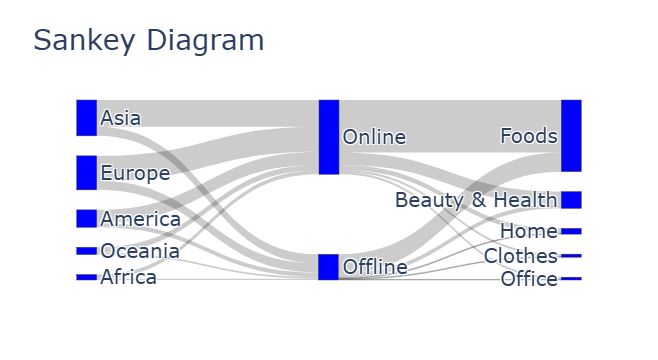

In [106]:
# 생키 다이어그램 차트 그리기

A = go.Sankey(node = dict(label = labels, color = "blue", thickness = 20),
              link = dict(source = source,
                          target = target, 
                          value = values))

data = [A]
layout = go.Layout(title = 'Sankey Diagram', font_size = 20)
fig = go.Figure(data, layout)
fig.show()

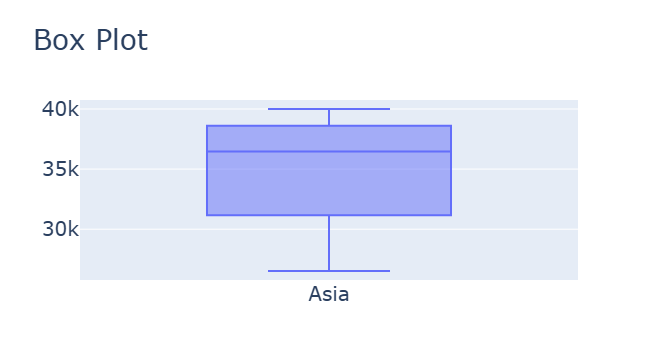

In [110]:
# 상자 그래프 그리기 // 대륙별로 상자 그래프 그리기

df_g = df20[["Region", "Revenue"]]

A = df_g[df_g["Region"] == "Asia"]
A = go.Box(y = A["Revenue"], name = "Asia")

data = [A]
layout = go.Layout(title = 'Box Plot', font_size = 20)
fig = go.Figure(data, layout)
fig.show()

In [124]:
# 상자 그래프 그리기 // 대륙별로 상자 그래프 그리기
df_g = df20[["Region", "Revenue"]]
df_g.groupby("Region")["Revenue"].sum()


Region
Africa     16358135.60
America    52518585.80
Asia      108086359.39
Europe    102577473.43
Oceania    21965963.90
Name: Revenue, dtype: float64

In [ ]:

data = [A]
layout = go.Layout(title = 'Box Plot', font_size = 20)
fig = go.Figure(data, layout)
fig.show()